In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define function for computing the gradient of a function f at point x.
# The gradient is approximated using the central difference method with a small step size h.
def numerical_gradient(f, x, h=1e-4):
    grad = np.zeros_like(x)
    for i in range(len(x)):
        x_minus = np.copy(x)
        x_plus = np.copy(x)
        x_minus[i] -= h
        x_plus[i] += h
        grad[i] = (f(x_plus) - f(x_minus)) / (2 * h)
    return grad

In [3]:
# Define function for performing gradient descent on a function f.
def gradient_descent(f, x_start, learning_rate=0.1, num_steps=100):
    x = x_start.copy()
    x_history = [x.copy()]

    for i in range(num_steps):
        grad = numerical_gradient(f, x)
        x -= learning_rate * grad  # Update x in the opposite direction of the gradient.
        x_history.append(x.copy())

    return x, x_history

In [4]:
# Set the function and initial point.
f = lambda x: x[0]**2 + x[1]**2
x = np.array([10.0, 10.0])

# Compute the gradient using the function.
print("Gradient at x =", x, ":", numerical_gradient(f, x))

final_x, x_history = gradient_descent(f, x, learning_rate=0.1, num_steps=50)

print("Final x:", np.round(final_x, 4))

Gradient at x = [10. 10.] : [20. 20.]
Final x: [0.0001 0.0001]


In [5]:

# Extended plot function that additionally marks the gradient descent trajectory and the optimum.
def plot_function_3d(f, x1_range=(-5, 5), x2_range=(-5, 5), num_points=400, x_history=None, optimum=None):
    # Generate a grid in the specified range.
    x1_vals = np.linspace(x1_range[0], x1_range[1], num_points)
    x2_vals = np.linspace(x2_range[0], x2_range[1], num_points)
    X1, X2 = np.meshgrid(x1_vals, x2_vals)
    
    # Vectorize the function if necessary.
    f_vec = np.vectorize(lambda x1, x2: f(np.array([x1, x2])))
    Z = f_vec(X1, X2)
    
    # Create the 3D plot.
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    surface = ax.plot_surface(X1, X2, Z, cmap='viridis', alpha=0.8)
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_zlabel("f(x)")
    ax.set_title("3D Plot of f(x1, x2)")
    fig.colorbar(surface, shrink=0.5, aspect=5)
    
    # If the gradient descent trajectory is provided, plot it:
    if x_history is not None:
        x_history = np.array(x_history)
        xs = x_history[:, 0]
        ys = x_history[:, 1]
        zs = np.array([f(np.array([xi, yi])) for xi, yi in zip(xs, ys)])
        ax.scatter(xs, ys, zs, color='red', marker='o', s=50, label='Gradient Descent')
        ax.plot(xs, ys, zs, color='red', linewidth=2)
    
    # If the optimum is provided, plot it:
    if optimum is not None:
        opt_x = optimum[0]
        opt_y = optimum[1]
        opt_z = f(np.array([opt_x, opt_y]))
        ax.scatter([opt_x], [opt_y], [opt_z], color='blue', marker='o', s=50, label='Optimum')
    
    ax.legend()
    plt.show()


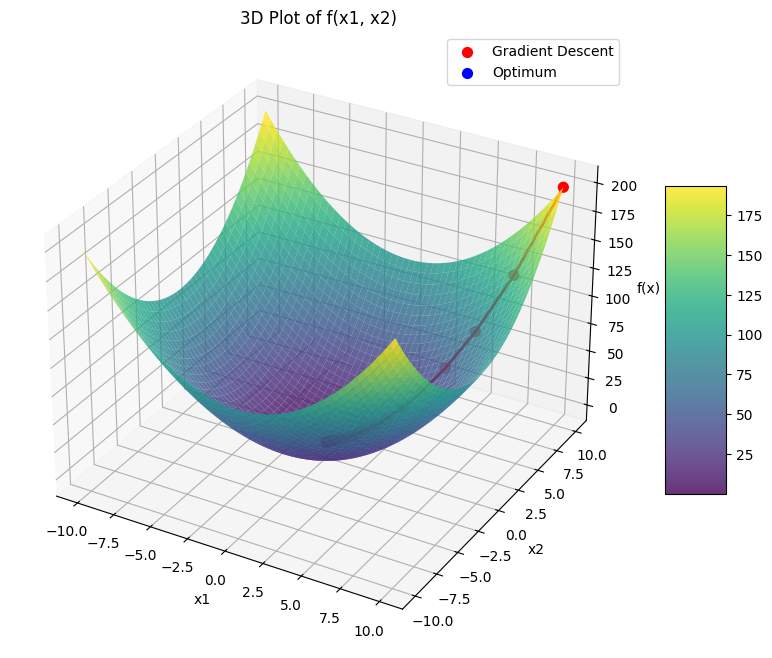

In [6]:
# The optimum is automatically provided as final_x from the gradient descent.
plot_function_3d(f, x1_range=(-10, 10), x2_range=(-10, 10), x_history=x_history, optimum=final_x)